In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Collapse
A bubble initially at eqb with ambient pressure $p_{\infty, 0}$ is suddenly appplied with a huge pressure pertubation $\Delta p$
$$\forall ~t>0, \quad p_\infty(t) = p_{\infty, 0} + \Delta p ~~\text{with} ~~\Delta p >> p_{\infty, 0}$$


# Rayleigh-Plesset Equation
$$
    \frac{1}{\rho_L} {(p_B(t) - p_{\infty}(t))} =  R\frac{d^2 R}{dt^2}
             + \frac{3}{2} (\frac{dR}{dt})^2 + \frac{4 \nu_L}{R} \frac{dR}{dt} + \frac{2\sigma}{\rho_L R}
$$
## Non dimensional numbers

(Use characteristic velocity scale as collapse velocity 
 $U_c = \sqrt{\frac{\Delta p}{\rho_L} }$ and length  scale $R_0$ and time scale $R_0/U_c$)

(1) ratio of  new ambient pressure to  old
$$
    p^* = \frac{p_{\infty}}{p_{\infty, 0}} = \frac{p_{\infty, 0} + \Delta p}{p_{\infty, 0}}
$$ 
(with $p^*>0$). In violent collapse $p^* >> 1$

(2) Weber Number, $We$
$$
        We = \frac{\Delta p R_0}{\sigma}
$$
(5) Reynolds Number
$$
    Re = \frac{R_0 \sqrt{\Delta p ~ \rho_L}}{\mu_L} 
$$
(6) Non-dim time
    $$
        t^* = {t}{U/R_0} = \sqrt{ \frac{\Delta p}{R_0} } \frac{1}{R_0} ~ t
    $$
(7) Non-dim Radius
    $$
       R^*(t^*) =  \frac{R(t^*)}{R_0}
    $$
(8) Non-dim Interface velocity
    $$
       U^*(t^*) = \frac{d R^*}{d t^*} =  \sqrt{\frac{\rho_L}{\Delta p}} \frac{d R}{d t}
    $$
 We alse have
    $$
       \frac{d R}{d t} =  \sqrt{\frac{\Delta p} {\rho_L}} \frac{d R^*}{d t^*} ~;\quad~
       \frac{d^2 R}{d t^2} =  \frac{1}{R_0} \frac{\Delta p} {\rho_L}  \frac{d^2 R^*}{d {t^*}^2} ~;\quad~
       \frac{p_{\infty, 0}}{\Delta p} = \frac{1}{p^* - 1} ~;\quad~
       \frac{p_{\infty}}{\Delta p} = \frac{p^*}{p^* - 1}
    $$
    
## R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + \frac{4}{Re} \frac{U^*}{R^*} + \frac{2}{We} \frac{1}{R^*} =
     \bigg( \frac{1}{p^*-1} + \frac{2}{We} \bigg) \left( \frac{1}{R^*} \right)^{3\gamma} - \frac{p^*}{p^*-1} 
$$
which gives

$$
\frac{d}{dt^*} 
\begin{bmatrix} R^* \\ U^* \end{bmatrix} =
\begin{bmatrix} U^* \\ \frac{1}{R^* }\left[
    \bigg( p^* - 1 + \frac{2}{We} \bigg) \left( \frac{1}{R^*} \right)^{3\gamma} - p^* -  \frac{3}{2} {U^*}^2 - \frac{4}{Re} \frac{U^*}{R^*} - \frac{2}{We} \frac{1}{R^*}
\right]
\end{bmatrix}
$$

In the above equation
$$  p_G(t^*) = \left[ \bigg(\frac{1}{p^* - 1}+ \frac{2}{We} \bigg) \left( \frac{1}{R^*}\right)^{3\gamma} \right] \Delta p  $$
$$  p_\infty (t^*) =  \frac{p^*}{p^* - 1} ~ \Delta p$$

## New stable radius ($We >> 1$). 
Assuming the bubble doesn't collapse completely , the new stable radius for an initially 'large' bubble
($We >> 1$)
$$
    R_\infty = R(t)\bigg|_{t \rightarrow \infty} 
    = R_0 \left[ \frac{ \frac{1}{p^* - 1}+ \frac{2}{We} }{ \frac{p^*}{p^* - 1} } \right]^{ \frac{1}{3\gamma} }
    = R_0 \left[ \frac{1}{p^*}+ \frac{p^* - 1}{p^*}\frac{2}{We} \right]^{ \frac{1}{3\gamma} } 
    \quad ~\text{given}\quad We >> 1
$$

## Integration of R-P (Non-dim)

In [3]:
#partial pressure of air as a function of R
def p_gas(Rstar):
    pg0 = 1./(pstar - 1) + 2./We;
    return pg0*np.power(Rstar, -3*gamma) 


#d/dt (x) = equation(x,t)
def RP(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = ( p_gas(Rstar) - pstar/(pstar - 1) - 1.5*Ustar**2 - 4*Ustar/(Re * Rstar) - 2/(We*Rstar) )/Rstar
    return (Ustar, dfdt)

def NewRadius():
    return np.power((1 + 2*(pstar-1)/We)/pstar, 1/(3*gamma))

def solve_RP (params, tsample):
    pstar, We, Re =  params;
    R_RP = odeint(RP, [1, 0], tstarsample)
    Ustarsample = R_RP[:,1]
    Rstarsample = R_RP[:,0]
    return (Rstarsample, Ustarsample);
    

## An Example


## Bubble response (RP) ('Large' Bubble $We >> 1$)


$$ p^* = 10 $$
$$ Re = 10 $$
$$ We = 1000 $$

In [4]:
gamma = 1.4;

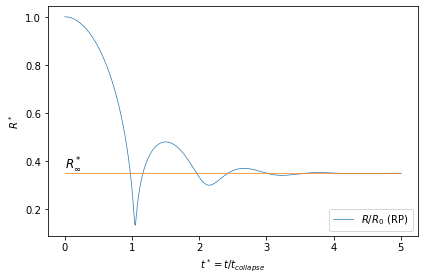

In [7]:
tend = 5.;  # t_end = 5 t_collapse
N=50000
tstarsample  = (tend/N)*np.array(range(N))

pstar = 100; Re = 10; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)

fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R^*$")
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$R/R_0$ (RP)")

Rinf = NewRadius();
ax1.plot([0,tend], [Rinf, Rinf], linewidth = 0.7)
plt.text(0, Rinf, r'$R_\infty^*$',ha='left', va='bottom', fontsize=12)

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Viscous Damping. Varying $Re$

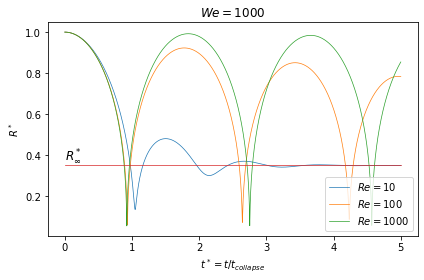

In [8]:
fig, ax1 = plt.subplots()

ax1.set_title(r"$We=1000$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R^*$")

pstar = 100; Re = 10; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 10$")
pstar = 100; Re = 100; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 100$")
pstar = 100; Re = 1000; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 1000$")

Rinf = NewRadius();
ax1.plot([0,tend], [Rinf, Rinf], linewidth = 0.7)
plt.text(0, Rinf, r'$R_\infty^*$',ha='left', va='bottom', fontsize=12)

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Small Perturbation. $p^* \rightarrow 1$ (Compare with Linearised solution)


    
### R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + \frac{4}{Re} \frac{U^*}{R^*} + \frac{2}{We} \frac{1}{R^*} =
     \bigg( \frac{1}{p^*-1} + \frac{2}{We} \bigg) \left( \frac{1}{R^*} \right)^{3\gamma} - \frac{p^*}{p^*-1} 
$$

### Linearise

$R^*$ remains close to $1$, which gives
$$
    R^* (t^*) = 1 + \epsilon (t 
$$


## New stable radius ($We >> 1$). 
Assuming the bubble doesn't collapse completely , the new stable radius for an initially 'large' bubble
($We >> 1$)
$$
    R_\infty = R(t)\bigg|_{t \rightarrow \infty} 
    = R_0 \left[ \frac{ \frac{1}{p^* - 1}+ \frac{2}{We} }{ \frac{p^*}{p^* - 1} } \right]^{ \frac{1}{3\gamma} }
    = R_0 \left[ \frac{1}{p^*}+ \frac{p^* - 1}{p^*}\frac{2}{We} \right]^{ \frac{1}{3\gamma} } 
    \quad ~\text{given}\quad We >> 1
$$

## Keller-Miksis (Weekly Compressible Liquid)

## Compare with DNS (Basilisk. [Fuster and Popinet])

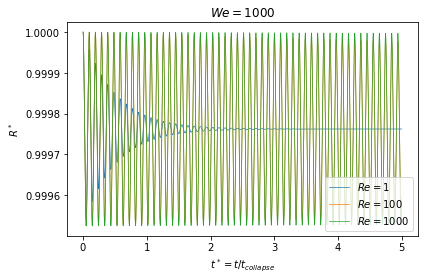

In [13]:
fig, ax1 = plt.subplots()

ax1.set_title(r"$We=1000$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R^*$")

pstar = 1.001; Re = 1; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 1$")
pstar = 1.001; Re = 100; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 100$")
pstar = 1.001; Re = 1000; We = 1000;
Rstarsample,  Ustarsample = solve_RP([pstar, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 1000$")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()
